<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/SampleEtivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Query to solve
What type of profile of customer has taken out a loan?
and secondly, where customers who took out a loan more likely to have a poutcome of success?

In [0]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sort=True

url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/bank_test.csv'
df = pd.read_csv(url_train)

First, lets look at some of the data's general characteristics

In [43]:
df.head()

,age,job,education,balance,loan,contact,subscribed
0,32.0,technician,tertiary,392,no,cellular,no
1,39.0,technician,secondary,688,yes,cellular,no
2,59.0,retired,secondary,1035,yes,cellular,no
3,47.0,blue-collar,secondary,398,yes,cellular,no
4,54.0,retired,secondary,1004,no,cellular,no


In [44]:
df.describe()

,age,balance
count,1988.000000,2000.000000
mean,41.753018,1413.663500
std,12.724358,3131.224213
min,18.000000,-980.000000
25%,32.000000,201.500000
50%,38.000000,551.000000
75%,50.000000,1644.500000
max,93.000000,81204.000000


The describe function treats the numeric fields of the dataset, calculating the useful statistic information such as mean, standard deviation, quartile values and max and min values for the 2000 samples.

A data clean is needed on the input forms as the age is not specified for all customers.  These rows should be identified and values entered.  Age may or may not be necessary for the bank.  However, for the bank to make decisions based on age may result in a false premise if the value is not recorded for all clients in the dataset.

It can be seen that the average balance amount is 1413 and the standard deviation is quite high at 3131



The next stage is to consider text based data and examine the individual columns for integrity.



In [45]:
df.shape[0]

2000

In [46]:
print('Percent of missing age values')
((df['age'].isna().sum())/(df.shape[0]))*100

Percent of missing age values


0.6

In [47]:
df.dtypes

age           float64
job            object
education      object
balance         int64
loan           object
contact        object
subscribed     object
dtype: object

In [48]:
#now we check for missing data 
# this shows the total count for information that is missing either empty or NaN
df.isna().sum()

age            12
job            10
education     104
balance         0
loan            0
contact       191
subscribed      0
dtype: int64

In [49]:
# this shows the total count for information that is missing either empty or NaN
df.isnull().sum()

age            12
job            10
education     104
balance         0
loan            0
contact       191
subscribed      0
dtype: int64

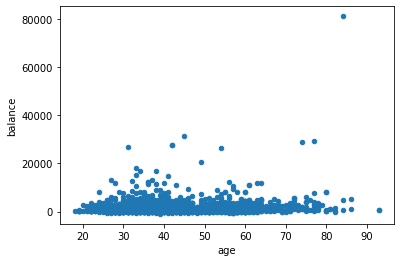

In [50]:
df.plot.scatter(x='age', y='balance')
plt.show()

# Analysis of columns
Discover dataset for customers with loans

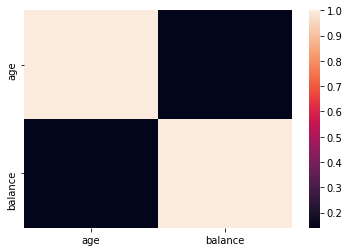

In [51]:
#correlation matrix
sns.heatmap(df.corr());

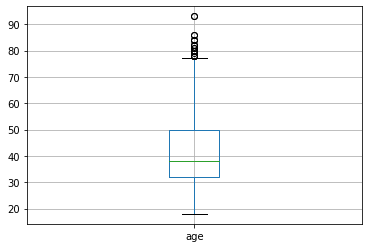

In [52]:
df.boxplot(column='age')
plt.show()

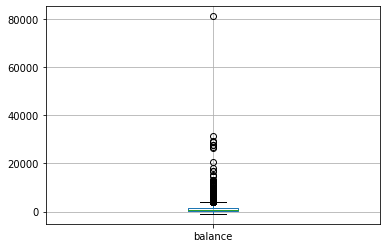

In [53]:
df.boxplot(column='balance')
plt.show()

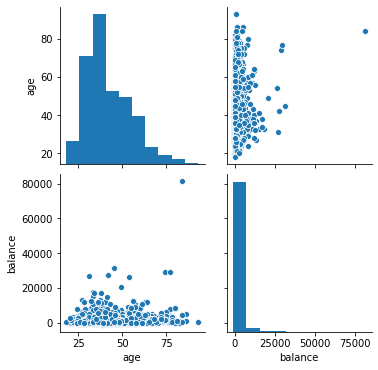

In [54]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance']].dropna())
plt.show()

In [55]:
print(df['age'].count())
print(df['age'].isnull().sum())
print(df['age'].value_counts())

1988
12
33.0    95
35.0    90
31.0    87
34.0    84
32.0    77
        ..
86.0     2
76.0     2
81.0     2
18.0     1
79.0     1
Name: age, Length: 68, dtype: int64


In [56]:
print(df['job'].count())
print(df['job'].isnull().sum())
print(df['job'].value_counts())


1990
10
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64


In [57]:
print(df['education'].count())
print(df['education'].isnull().sum())
print(df['education'].value_counts())

1896
104
secondary    995
tertiary     684
primary      217
Name: education, dtype: int64


In [58]:
print(df['loan'].count())
print(df['loan'].isnull().sum())
print(df['loan'].value_counts())

2000
0
no     1750
yes     250
Name: loan, dtype: int64


In [59]:
print(df['contact'].count())
print(df['contact'].isnull().sum())
print(df['contact'].value_counts())

1809
191
cellular     1663
telephone     146
Name: contact, dtype: int64


In [60]:
print(df['subscribed'].count())
print(df['subscribed'].isnull().sum())
print(df['subscribed'].value_counts())

2000
0
no     1000
yes    1000
Name: subscribed, dtype: int64


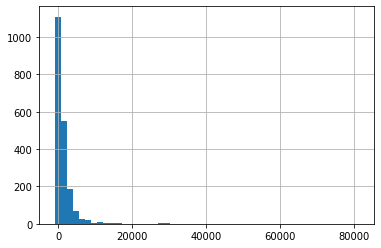

In [61]:
df['balance'].hist(bins=50)

## Mote pattern checks

In [66]:
test = df.groupby(['job','loan'])
test.size()

job            loan
admin.         no      212
               yes      35
blue-collar    no      255
               yes      43
entrepreneur   no       35
               yes      10
housemaid      no       34
               yes       1
management     no      411
               yes      50
retired        no      148
               yes      14
self-employed  no       56
               yes       8
services       no      137
               yes      28
student        no       96
technician     no      294
               yes      54
unemployed     no       62
               yes       7
dtype: int64

sample set

In [77]:
test = df.groupby(['job'])
test.describe()

age                        ... balance                  
               count       mean        std  ...     50%      75%      max
job                                         ...                          
admin.         246.0  40.910569  10.157139  ...   464.0  1295.00  14968.0
blue-collar    297.0  39.754209   9.340600  ...   360.0   877.75  15341.0
entrepreneur    45.0  43.733333  10.888693  ...   351.0  1631.00   6403.0
housemaid       35.0  47.314286  13.457496  ...   605.0  2071.50  26965.0
management     458.0  40.196507  10.026913  ...   698.0  2016.00  31472.0
retired        161.0  67.049689   8.954609  ...  1242.5  2809.25  81204.0
self-employed   61.0  39.655738  12.228226  ...   655.0  1508.75  10861.0
services       164.0  38.170732   8.993938  ...   453.0  1099.00  11650.0
student         95.0  25.673684   4.420557  ...   828.0  1933.00  13107.0
technician     347.0  40.293948   9.781724  ...   481.0  1284.50  16992.0
unemployed      69.0  39.405797   9.895511  ...   771.0  1416.00   7968.0

[11 rows x 16 columns]

In [78]:
test = df.groupby(['education'])
test.describe()

age                              ... balance                        
           count       mean        std   min  ...     25%    50%     75%      max
education                                     ...                                
primary    216.0  50.750000  15.215124  19.0  ...   134.0  449.0  1452.0  29340.0
secondary  991.0  41.262361  12.024713  19.0  ...   194.0  505.0  1409.5  81204.0
tertiary   677.0  39.146233  10.741621  21.0  ...   224.0  629.5  1857.5  31472.0

[3 rows x 16 columns]

In [79]:
test = df.groupby(['subscribed'])
test.describe()

age                              ... balance                         
            count       mean        std   min  ...     25%    50%      75%      max
subscribed                                     ...                                 
no          991.0  40.655903   9.192425  22.0  ...  114.75  393.0   970.25  26306.0
yes         997.0  42.843531  15.382656  18.0  ...  315.00  875.0  2304.50  81204.0

[2 rows x 16 columns]

In [85]:
#s1=pd.Series(df.education)
#s2=pd.Series(df.balance)
#s1.corr(s2,method=pearson)

NameError: ignored